In [1]:
#This notebook shows the ROC curve and confusion matrix for classification by random forest
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd       
df_train = pd.read_csv("clean_train.csv")

In [7]:
df_train.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,Explanation Why edit make username Hardcore Me...,0,0,0,0,0,0
1,1,000103f0d9cfb60f,D'aww! He match background colour I'm seemingl...,0,0,0,0,0,0
2,2,000113f07ec002fd,"Hey man, I'm really try edit war. It's guy con...",0,0,0,0,0,0
3,3,0001b41b1c6bb37e,""" More I can't make real suggestions improveme...",0,0,0,0,0,0
4,4,0001d958c54c6e35,"You, sir, hero. Any chance remember page that'...",0,0,0,0,0,0


In [2]:
#Bag of word representation
#max_features = 5000 for save memory
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [3]:
train_data_features = vectorizer.fit_transform(df_train["comment_text"])

In [4]:
#Split data into train and validation
#Try to predict toxic or not
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
   train_data_features, df_train["toxic"], test_size=0.50, random_state=42)

In [7]:
#RandomForest, we gonna learn later
#(I thoght to use logistic regression first but it can't because of memory limitation)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, y_train)

result = forest.predict(X_valid)
#make series to list
y_valid = list(y_valid)

In [9]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     72119
          1       0.83      0.64      0.72      7667

avg / total       0.95      0.95      0.95     79786



In [13]:
#Confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, result)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)
# Confusion matrix shows
# [[TP FP]
# [FN TN]]
# as matrix

[[0.98639748 0.01360252]
 [0.36363636 0.63636364]]


In [14]:
#Probability to calculate ROC curve
prob = forest.predict_proba(X_valid)[:,1]

#fpr:False Positive, tpr: True Positive
#Positive = Toxic comment
fpr, tpr, thresholds = mtr.roc_curve(y_valid, prob)

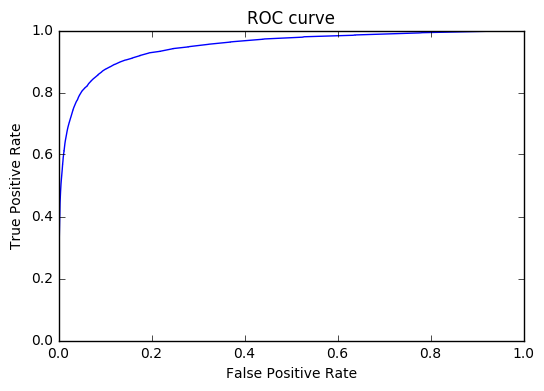

In [16]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [6]:
#Severe toxic
X_train, X_valid, y_train, y_valid = train_test_split(
   train_data_features, df_train["severe_toxic"], test_size=0.50, random_state=42)

In [8]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, y_train)
result = forest.predict(X_valid)
#make series to list
y_valid = list(y_valid)

In [9]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     78979
          1       0.45      0.12      0.19       807

avg / total       0.99      0.99      0.99     79786



In [10]:
cm = confusion_matrix(y_valid, result)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[0.99849327 0.00150673]
 [0.87732342 0.12267658]]


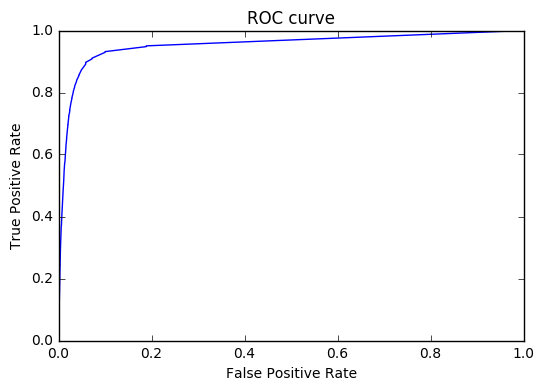

In [11]:
prob = forest.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = mtr.roc_curve(y_valid, prob)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [12]:
#obscene
X_train, X_valid, y_train, y_valid = train_test_split(
   train_data_features, df_train["obscene"], test_size=0.50, random_state=42)

In [13]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, y_train)
result = forest.predict(X_valid)
#make series to list
y_valid = list(y_valid)

In [14]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99     75559
          1       0.85      0.70      0.77      4227

avg / total       0.98      0.98      0.98     79786



In [15]:
cm = confusion_matrix(y_valid, result)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[0.99294591 0.00705409]
 [0.30163236 0.69836764]]


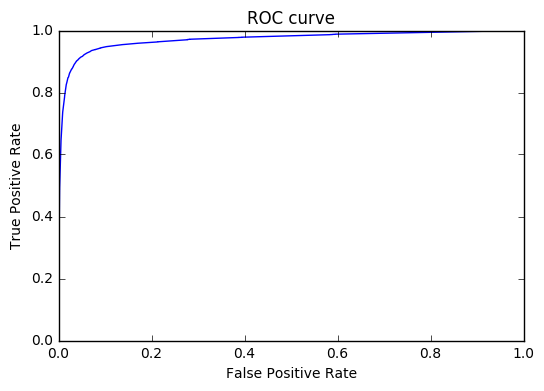

In [16]:
prob = forest.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = mtr.roc_curve(y_valid, prob)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [17]:
#Threat
X_train, X_valid, y_train, y_valid = train_test_split(
   train_data_features, df_train["threat"], test_size=0.50, random_state=42)

In [18]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, y_train)
result = forest.predict(X_valid)
#make series to list
y_valid = list(y_valid)

In [19]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     79556
          1       0.54      0.06      0.10       230

avg / total       1.00      1.00      1.00     79786



In [34]:
import math
cm = confusion_matrix(y_valid, result)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = [[math.floor(cm[0][0]*100),math.floor(cm[0][1]*100)],[math.floor(cm[1][0]*100),math.floor(cm[1][1]*100)]]
print(cm)

[[99, 0], [94, 5]]


In [35]:
#insult
X_train, X_valid, y_train, y_valid = train_test_split(
   train_data_features, df_train["insult"], test_size=0.50, random_state=42)

In [36]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, y_train)
result = forest.predict(X_valid)
#make series to list
y_valid = list(y_valid)

In [37]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98     75822
          1       0.73      0.53      0.62      3964

avg / total       0.96      0.97      0.96     79786



In [38]:
cm = confusion_matrix(y_valid, result)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[0.98980507 0.01019493]
 [0.46695257 0.53304743]]


In [39]:
#identity_hate
X_train, X_valid, y_train, y_valid = train_test_split(
   train_data_features, df_train["identity_hate"], test_size=0.50, random_state=42)

In [40]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, y_train)
result = forest.predict(X_valid)
#make series to list
y_valid = list(y_valid)

In [41]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     79079
          1       0.51      0.13      0.21       707

avg / total       0.99      0.99      0.99     79786



In [42]:
cm = confusion_matrix(y_valid, result)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[0.99889983 0.00110017]
 [0.87128713 0.12871287]]
